# Занятие 5
# Прикладная алгебра и численные методы
## Интерполяция: оценка близости функций, нормы

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg
import sympy
from sympy import S, interpolating_spline, latex
from sympy.polys.specialpolys import interpolating_poly
from scipy.interpolate import lagrange, interp1d, splrep, splev
from scipy.interpolate import InterpolatedUnivariateSpline, BPoly, CubicSpline
from scipy.linalg import norm
from google.colab import files
from IPython.display import Latex

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.norm.html

https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html


## Многочлен Лагранжа
$$
f(x) = L(x) = \sum_{i=1}^n y_i 
\frac{(x - x_0)(x - x_1)...(x - x_{i-1})(x - x_{i+1})...(x - x_n)}{(x_i - x_0)(x_i - x_1)...(x_i - x_{i-1})(x_i - x_{i+1})...(x_i - x_n)}, 
\quad y_i = f(x_i), \quad i = 0, ..., n.
$$
## Пример 1
Построим полином Лагранжа для данных 

https://showdata.gks.ru/report/278934/

файл 6_population.xlsx

Из файла считать данные общего прироста населения РФ в 2015-2021 гг., построить полином Лагранжа в помощью scipy.interpolate

Построить график полученного полинома, отметить соответствующие данным точками.

Для чтения из файла будем пользоваться read_excel

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

Для загрузки файла с компьютера используем средства colab:



```
from google.colab import files
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
```

In [4]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving 23110000100100200001_Общий_прирост_постоянного_населения (2).xlsx to 23110000100100200001_Общий_прирост_постоянного_населения (2).xlsx
User uploaded file "23110000100100200001_Общий_прирост_постоянного_населения (2).xlsx" with length 14834 bytes


После успешной загрузки файла считаем из него данные. 

Выведем на экран основные атрибуты полученных данных:

In [5]:
rexcel = pd.read_excel(fn, index_col=0, skiprows=[0, 1])
print(f"""index: {rexcel[:10].index},\ncolumns: {rexcel[:10].columns},\nvalues: {rexcel[:3].values},\naxes: {rexcel[:10].axes},
ndim: {rexcel.ndim}, size: {rexcel.size}, shape: {rexcel.shape}, empty: {rexcel.empty}""")

index: Index(['Российская Федерация', 'Центральный федеральный округ',
       'Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область'],
      dtype='object', name='все население'),
columns: Index(['w2:p_mest:11', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object'),
values: [[ 6.43000e+02  2.77422e+05  2.59662e+05  7.60600e+04 -9.97120e+04
  -3.21300e+04 -5.77575e+05 -6.13439e+05]
 [ 3.00000e+01  1.52840e+05  1.05263e+05  1.01831e+05  6.66460e+04
   5.54970e+04 -1.82596e+05 -1.46560e+05]
 [ 1.40000e+10  2.20100e+03  2.72800e+03 -2.98900e+03 -2.45800e+03
   1.73300e+03 -7.89200e+03 -9.34200e+03]],
axes: [Index(['Российская Федерация', 'Центральный федеральный округ',
       'Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская 

Выделим данные о приросте численности населения РФ с 2015 по 2021:

array([ 277422.,  259662.,   76060.,  -99712.,  -32130., -577575.,
       -613439.])

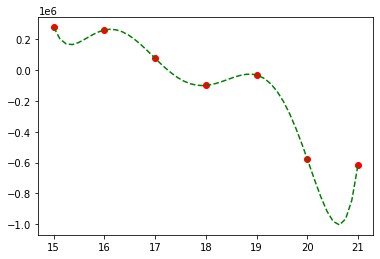

In [6]:
Y1 = rexcel.values[0, 1:]
display(Y1)
X1 = np.array([15 + k for k in range(len(Y1))])
poly1 = lagrange(X1, Y1)
X1ls = np.linspace(X1[0], X1[-1])
plt.plot(X1, Y1, 'ro', X1ls, poly1(X1ls), 'g--')

## Нормы

Действительное или комплексное пространство $V$ называется **нормированным**, если на нем задана **норма**, т.е. функция $\nu$: $V\to R$ такая, что

1) $\nu(\bar x) > 0$ для любого $\bar x \ne \bar 0$,

2) $\nu(\alpha\bar x) = |\alpha| \nu(\bar x)$ для любого $\bar x$ из $V$,

3) $\nu(\bar x + \bar y) \le \nu(\bar x) + \nu(\bar y)$, для любых $\bar x$ и $\bar y$ из $V$ - неравенство треугольника.

**Примеры норм:**

1) Длина - евклидова норма $|\bar x|_2 = \sqrt{x_1^2 + x_2^2 + ... + x_n^2}$.

2) Манхэттенская норма $|\bar x|_1 = |x_1| + |x_2| + ... + |x_n|$.

3) Норма максимума $|\bar x|_\infty = \max\{|x_1|, |x_2|, ..., |x_n|\}$.

4) $p$-норма, норма Минковского $|\bar x|_p = \sqrt[p]{|x_1|^p + |x_2|^p + ... + |x_n|^p}$.

**Нормы в scipy.linalg** и **numpy.linalg**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.norm.html

**scipy.linalg.norm(a, ord=None, axis=None, keepdims=False, check_finite=True)**

https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

**linalg.norm(a, ord=None, axis=None, keepdims=False)**

a - матрица или вектор

ord - вид нормы, для векторных норм

None -  $2$-норма (евклидова)

inf (np.inf) - норма максимума

-inf (np.inf) - "норма" минимума $|\bar x|_\infty = \min\{|x_1|, |x_2|, ..., |x_n|\}$

1 - Манхэттенская норма,

0 - количество ненулевых координат вектора $\bar x$.

## Пример 2.
Построим кубический сплайн для данных из Примера 1.

Построим на одном графике сплайн и полином Лагранжа Примера 1, отметим на нем  точки данных. 

Вычислим значения сплайна и полинома Лагранжа в серединах отрезков между соседними точками данных (т.е. в 0.5, 1.5, 2.5 и т.п.), найдем нормы разности полученных векторов.

Нормы:
-1: 6695.3661
0: 6.0
1: 580945.8578
2: 330543.9426
3: 300115.2898
inf: 290717.8348
-inf: 19656.4415


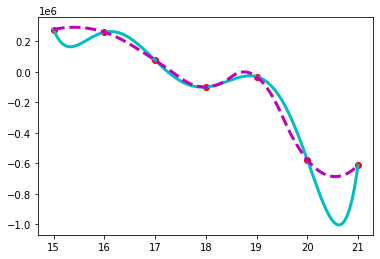

In [7]:
spl2_cubic = interp1d(X1, Y1, kind='quadratic')
xs = np.linspace(X1[0], X1[-1], 1000)
plt.plot(X1, Y1, 'ro', xs, poly1(xs), 'c-', xs, spl2_cubic(xs), 'm--', lw=3)
X2 = np.arange(X1[0] + 0.5, X1[-1], 1)
difference2 = poly1(X2) - spl2_cubic(X2)
print('Нормы:', *[f'{item}: {round(norm(difference2, item), 4)}' for item in list(range(-1, 4)) + [np.inf, -np.inf]], sep='\n')

# Рисование шаров в нормах
# Пример 3
$V = R^2$, $\nu(x)=|x|_p$, $p \ge 1$.
$B = B_1^\nu(O)$ - единичный шар с ценром $\bar O$.

Нарисуем шары при $p = 1$, $\sqrt{2}$, $3$, $\infty$.

Поскольку пространство $V = R^2$ - вещественная плоскость, то
$|\bar x|_p = \sqrt[p]{|x_1|^p + |x_2|^p}$. Т.к. для всех точек шара $B = B_1^\nu(O)$ выполняется $|\bar x|_p = 1$, то $x_2 = \pm\sqrt[p]{1 - |x_1|^p}$.

Для бесконечной нормы при $-1 \le x_1 \le 1$ получим $x_2 = \pm 1$, а при $x_1 = \pm 1$  получим $-1 \le x_2 \le 1$.


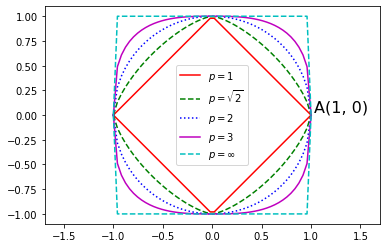

In [8]:
def Y(X, p):
    Y1 = (1 - abs(X) ** p) ** (1 / p)
    return (-Y1, Y1)

X = np.linspace(-1, 1)
plt.axis('equal')
for p, label, color in zip((1, np.sqrt(2), 2, 3, 100),
                    (1, '\\sqrt{2}', 2, 3, '\\infty'),
                    ('r-', 'g--', 'b:', 'm-', 'c--')):
    Y1, Y2 = Y(X, p)
    plt.plot(X, Y1, color)
    plt.plot(X, Y2, color, label=f'$p = {label}$')
plt.annotate('A(1, 0)', xy=(1, 0), xytext=(1.03, 0.03), fontsize=16)
plt.legend()      

# Сохранение рисунка в файл в matplotlib.
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html?highlight=savefig#matplotlib.pyplot.savefig

savefig(fname, *, dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, **kwargs
       )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

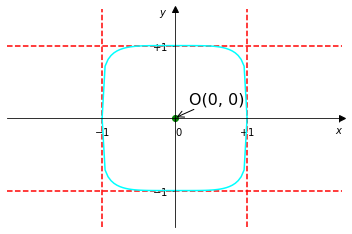

In [9]:
# gca - get current axis - получаем доступ к системе координат
ax = plt.gca() 
# Устанавливаем оси координат 
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
# Стрелки на концах осей координат
ax.plot(1, 0, '>k', transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, '^k', transform=ax.get_xaxis_transform(), clip_on=False)
# Тики (зарубки) на осях
# Позиции тиков (если не нужно изменять автоматические подписи к тикам)
ax.set_xticks([-1, 0, 1, 2.27])
ax.set_yticks([-1, 1, 1.47])
# Установка подписей тиков
ax.set_xticklabels([r'$-1$', '   $0$', r'$+1$', '$x$'])
ax.set_yticklabels([r'$-1$', r'$+1$', '$y$'])
# Одинаковый масштаб по осям
ax.axis('equal')
# устанавливаем пределы по осям 
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
# Рисуем вертикальные и горизонтальные прямые
ax.axvline(x=-1, color='red', linestyle='--')
ax.axvline(x=1, color='red', linestyle='--')
ax.axhline(y=-1, color='red', linestyle='--')
ax.axhline(y=1, color='red', linestyle='--')
# шар по норме 5
X = np.linspace(-1, 1)
Y1, Y2 = Y(X, 5)
ax.plot(X, Y1, color='cyan')
ax.plot(X, Y2, color='cyan')
ax.scatter([0], [0], color='green')
#  подпись к точке на графике
ax.annotate('O(0, 0)', xy=(0, 0), xytext=(0.2, 0.2), fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

# Сохранение рисунка в файл
plt.savefig('norm_5.jpg', format='jpg')
# Скачивание файла с рисунком
files.download('norm_5.jpg')

## Кривые Безье

https://bezier.readthedocs.io/en/stable/python/reference/bezier.curve.html

## Пример 4
Построим кривую Безье с помощью модуля bezier:

https://bezier.readthedocs.io/en/stable/python/reference/bezier.curve.html

Кривая должна аппроксимировать $f(x) = \sin(x/3)$, проходя через точки $\pi/2$ и $3\pi/2$, при этом в этих точках касательная кривой Безье должна совпадать с касательной $f(x)$.

Построим на общем графике $f(x)$ и кривую Безье, отметим узловые точки.

Вначале определим функцию $f4(x)$, затем составим список точек $x_1, x_2, x_3, x_4$ для построения кривой Безье. Концы $x_1, x_4$ берем из условия, это $\pi/2$ и $3\pi/2$, $\pi$ берем из sympy. Промежуточные точки $x_2, x_3$ определим из условия на производные: прямая, соединяющая первую точку со второй должна быть касательной к $f(x)$. Выберем значения $x_2$ и $x_3$, так чтобы они делили отрезок $[x_1, x_4]$ на одинаковые части, т.е. $x_i = x_1 + i \Delta x$, $\Delta x = (x_4 - x_1) / 3$, $i = 2, 3$.  Вертикальные координаты промежуточных точек такие: $y_2 = y_1 + f'(x_1)\Delta x$, $y_3 = y_4 - f'(x_4)\Delta x$.


In [13]:
!pip install bezier --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.9 MB/s eta 0:00:00


In [15]:
import bezier
import sympy
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex

In [12]:
def f4(x):  
  return sympy.sin(x / 3)
  
x = sympy.Symbol('x')
x1 = sympy.pi / 2
x4 = 3 * sympy.pi / 2
delta_x = (x4 - x1) / 3
X4 = [x1 + delta_x * i for i in range(4)]
display(Latex(sympy.latex(X4)))

<IPython.core.display.Latex object>

Нужно вычислить производную $f(x)$ в произвольной точке и в точках $x_1, x_4$. 

In [13]:
df4 = f4(x).diff(x)
Y4 = [f4(X4[0]), f4(X4[0]) + df4.subs(x, X4[0]) * delta_x,
      f4(X4[-1]) - df4.subs(x, X4[-1]) * delta_x, f4(X4[-1])]
nodes = np.asfarray([X4, Y4])
curve4 = bezier.Curve(nodes, degree=3)

Теперь осталось построить график. Для того, чтобы кривая Безье попала на один график с f4, нужно применить метод plot из matplotlib.pyplot к системе координат, записанной в переменной ax и передать ax как аргумент методу plot класса кривых Безье. Доступ к системе координат обеспечивается subplots. 

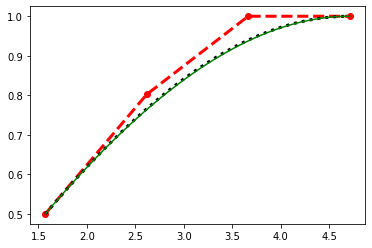

In [17]:
X4plt = np.linspace(*np.asfarray([X4[0], X4[-1]]), 1000)
npf4 = sympy.lambdify(x, f4(x))
fig, ax = plt.subplots()
ax.plot(X4, Y4, 'r--o', X4plt, npf4(X4plt), 'k:', lw=3)
curve4.plot(100, color='green', ax=ax)

# Рисование кривыми Безье

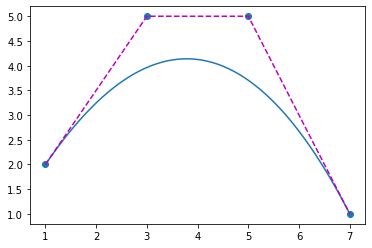

In [ ]:
X5 = [1, 3, 5, 7]
Y5 =  [2, 5, 5, 1]
nodes = np.array([X5, Y5])
curve5 = bezier.Curve(nodes, degree=3)
curve5.plot(num_pts=100)
plt.scatter(X5, Y5)
plt.plot(X5, Y5, 'm--')

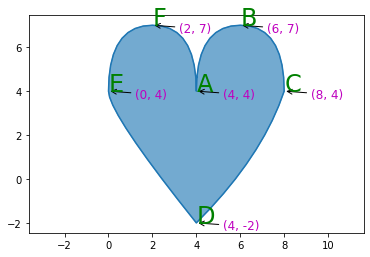

In [ ]:
nodes_arr = [np.array([[4, 4, 6], [4, 7, 7]]),
             np.array([[6, 8, 8], [7, 7, 4]]),
             np.array([[8, 7, 4], [4, 1, -2]]),
             np.array([[4, 0, 0], [-2, 3, 4]]),
             np.array([[0, 0, 2], [4, 7, 7]]),
             np.array([[2, 4, 4], [7, 7, 4]])]

curved_poly = bezier.CurvedPolygon(*[bezier.Curve(nodes, degree=2) for nodes in nodes_arr])

curved_poly.plot(pts_per_edge=10)  
plt.axis('equal')

for P, coords in zip(('A', 'B', 'C', 'D', 'E', 'F'),
                     ((4, 4), (6, 7), (8, 4), (4, -2), (0, 4), (2, 7))):
    plt.annotate('({}, {})'.format(*coords), xy=coords, xytext=(coords[0] + 1.2, coords[1] - 0.3), 
                 fontsize=12, color='m', arrowprops=dict(arrowstyle="->", connectionstyle="arc3")) 
    plt.annotate(P, xy=coords, fontsize=24, color='g')

# Кривые Безье в matplotlib

https://matplotlib.org/stable/api/path_api.html#matplotlib.path.Path

Класс Path(vertices, codes=None, _interpolation_steps=1, closed=False, readonly=False)

предназначен для рисования серии не обязательно замкнутых или соединенных друг с другом линий.

vertices и codes - сооответствующие друг другу **numpy arrays**:

vertices: массив размерности Nx2 из чисел float - координаты опорных точек

codes: массив размерности  N из кодов линий, uint8, или None


Типы кодов (codes):

MOVETO: 1 точка - переместить карандаш в точку.

Pick up the pen and move to the given vertex.

LINETO: 1 точка - провести линию из текущей точки в заданную точку.

Draw a line from the current position to the given vertex.

CURVE3: 1 опорная точка, 1 конечная точка - квадратичная кривая Безье, соединяющая текущую позицию с конечной точкой, имеющая заданную опорную точку.

Draw a quadratic Bezier curve from the current position, with the given control point, to the given end point.

CURVE4: 2 опорных точки, 1 конечная точка - кубическая кривая Безье, соединяющая текущую позицию с конечной точкой, имеющая заданные две опорные точки.

Draw a cubic Bezier curve from the current position, with the given control points, to the given end point.

CLOSEPOLY: 1 точка (игнорируется) - рисуется отрезок от текущей позации к началу текущей линии.

Draw a line segment to the start point of the current polyline.


Text(0.5, 1.0, 'The red point should be on the path')

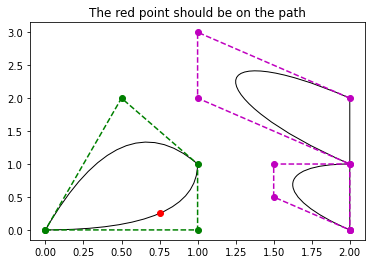

In [ ]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches

Path = mpath.Path
vertices = [(0, 0), (1, 0), (1, 1), (0.5, 2), (0, 0)]
np_vert = np.array(vertices)

fig, ax = plt.subplots()
ax.plot(np_vert[:, 0], np_vert[:, 1], 'g--o')
pp1 = mpatches.PathPatch(
    Path(vertices,
         [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CURVE3, Path.LINETO]),
    fc="none", transform=ax.transData)
ax.add_patch(pp1)

vertices = [(2, 2), (1, 3), (1, 2), (2, 1), (2, 0)]
np_vert = np.array(vertices)
ax.plot(np_vert[:, 0], np_vert[:, 1], 'm--o')
pp2 = mpatches.PathPatch(
    Path(vertices,
         [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4, Path.CLOSEPOLY]),
    fc="none", transform=ax.transData)
ax.add_patch(pp2)

vertices = [(2, 1), (1.5, 1), (1.5, 0.5), (2, 0), (2, 0)]
np_vert = np.array(vertices)
ax.plot(np_vert[:, 0], np_vert[:, 1], 'm--o')
pp2 = mpatches.PathPatch(
    Path(vertices,
         [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4, Path.CLOSEPOLY]),
    fc="none", transform=ax.transData)
ax.add_patch(pp2)